# Lung Cancer Detection

### Anvil Installation

In [ ]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=512
Batch_Size=16
CHANNELS=3
EPOCHS=10

### Data Set Loading

In [ ]:
dataset=tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset",shuffle=True,image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=Batch_Size)

Found 1097 files belonging to 3 classes.


In [ ]:
class_names=dataset.class_names
class_names

['Bengin cases', 'Malignant cases', 'Normal cases']

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import DenseNet121

IMAGE_SIZE = 224
Batch_Size = 32

AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset = dataset.prefetch(buffer_size=AUTOTUNE)

densenet_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

features = densenet_base.predict(dataset)

print("Features shape:", features.shape)


Found 1097 files belonging to 3 classes.
35/35 [==============================] - 223s 6s/step
Features shape: (1097, 7, 7, 1024)


### Creating Labels

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder


class_names = dataset.class_names

class_to_label = {'Bengin cases': 0, 'Malignant cases': 1, 'Normal cases': 2}

image_labels = []
for images, batch_labels in dataset:
    for label in batch_labels.numpy():
        class_name = class_names[label]
        image_labels.append(class_to_label[class_name])

print("Labels:", image_labels)


Found 1097 files belonging to 3 classes.
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Label Encoding

In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

IMAGE_SIZE = 224
Batch_Size = 32

class_names = dataset.class_names

label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(class_names)

class_to_label = {class_name: label for class_name, label in zip(class_names, labels)}

image_labels = []
for images, batch_labels in dataset:
    for label in batch_labels.numpy():
        class_name = class_names[label]
        image_labels.append(class_to_label[class_name])

print("Labels:", image_labels)


Found 1097 files belonging to 3 classes.
Labels: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Splitting the Dataset

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

image_labels_np = np.array(image_labels)

X_train, X_test, y_train, y_test = train_test_split(features, image_labels_np, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

print("Shapes:")
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


Training set size: 877
Testing set size: 220
Shapes:
X_train: (877, 7, 7, 1024)
y_train: (877,)
X_test: (220, 7, 7, 1024)
y_test: (220,)


### Reshaping the X_trian and X_test

In [ ]:
import numpy as np

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)


### Applying it to XGB model

In [ ]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)

xgb_model = xgb.XGBClassifier(num_class=num_classes)

eval_set = [(X_train, y_train_encoded), (X_test, y_test_encoded)]
xgb_model.fit(X_train, y_train_encoded, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)

y_pred_encoded = xgb_model.predict(X_test)

y_pred = label_encoder.inverse_transform(y_pred_encoded)



/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-merror:0.01368	validation_0-mlogloss:0.72489	validation_1-merror:0.12273	validation_1-mlogloss:0.78182
[1]	validation_0-merror:0.00570	validation_0-mlogloss:0.50575	validation_1-merror:0.09545	validation_1-mlogloss:0.59868
[2]	validation_0-merror:0.00570	validation_0-mlogloss:0.36317	validation_1-merror:0.07727	validation_1-mlogloss:0.47280
[3]	validation_0-merror:0.00228	validation_0-mlogloss:0.26607	validation_1-merror:0.06364	validation_1-mlogloss:0.38260
[4]	validation_0-merror:0.00228	validation_0-mlogloss:0.19716	validation_1-merror:0.06364	validation_1-mlogloss:0.31791
[5]	validation_0-merror:0.00000	validation_0-mlogloss:0.14695	validation_1-merror:0.06364	validation_1-mlogloss:0.27157
[6]	validation_0-merror:0.00000	validation_0-mlogloss:0.11103	validation_1-merror:0.05455	validation_1-mlogloss:0.23734
[7]	validation_0-merror:0.00000	validation_0-mlogloss:0.08461	validation_1-merror:0.05455	validation_1-mlogloss:0.21240
[8]	validation_0-merror:0.00000	validati

### Finding Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9727272727272728


### Plotting Graphs between Training and Validation Accuracies and Losses

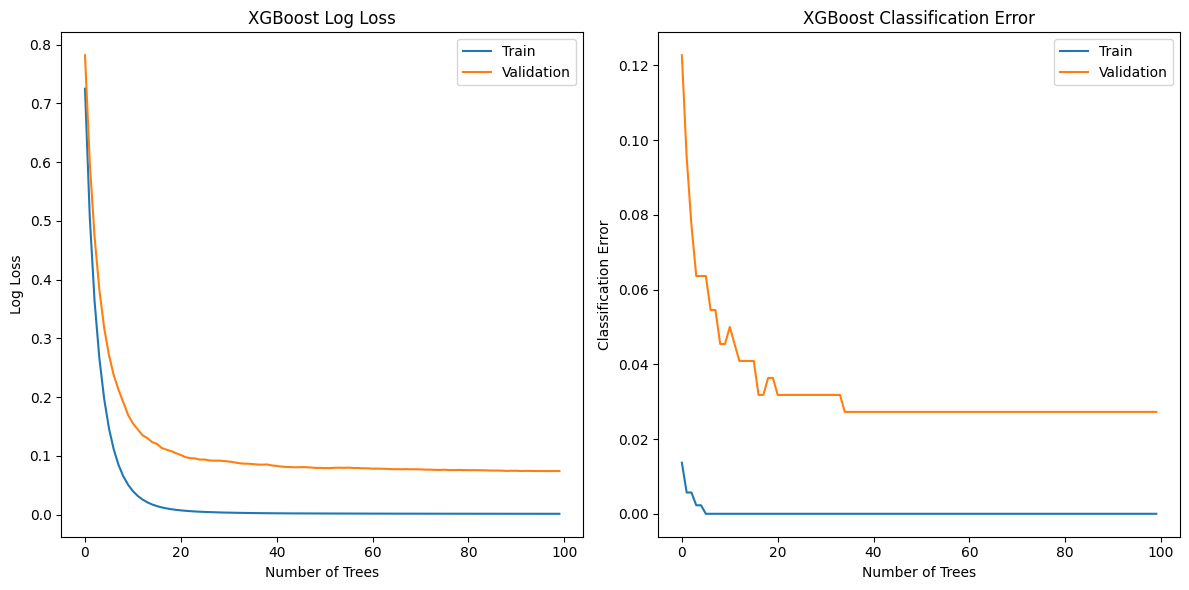

Number of epochs: 100
Final training log loss: 0.00150665304318369
Final validation log loss: 0.0743412297729678
Final training classification error: 0.0
Final validation classification error: 0.02727272727272727


In [ ]:

results = xgb_model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
plt.plot(x_axis, results['validation_1']['mlogloss'], label='Validation')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_axis, results['validation_0']['merror'], label='Train')
plt.plot(x_axis, results['validation_1']['merror'], label='Validation')
plt.xlabel('Number of Trees')
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.legend()

plt.tight_layout()
plt.show()

print("Number of epochs:", epochs)
print("Final training log loss:", results['validation_0']['mlogloss'][-1])
print("Final validation log loss:", results['validation_1']['mlogloss'][-1])
print("Final training classification error:", results['validation_0']['merror'][-1])
print("Final validation classification error:", results['validation_1']['merror'][-1])


### Summary of DenseNet Model

In [ ]:
print("DenseNet Model Summary:")
print(densenet_base.summary())


DenseNet Model Summary:
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 230, 230, 3)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 112, 112, 64)         9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 112, 112, 64)         256   

### Plotting all functioning of DenseNet Model

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.693966 to fit



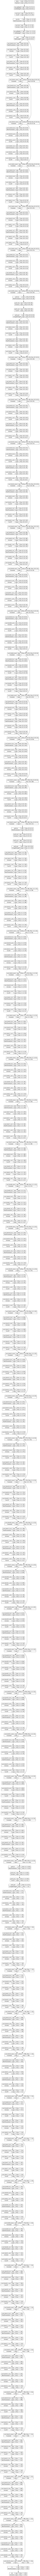

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(densenet_base, to_file='densenet_model.png', show_shapes=True)


In [ ]:
print("Shape of Extracted Features:", features.shape)


Shape of Extracted Features: (1097, 7, 7, 1024)


### Feature Map for the DenseNet Model

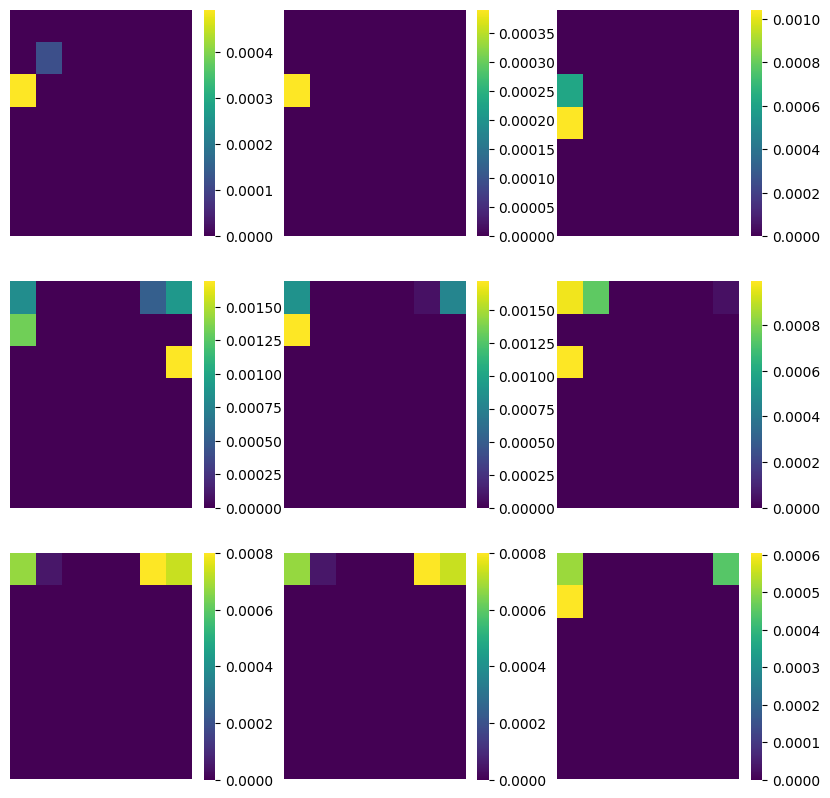

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    sns.heatmap(features[i][:, :, 0], cmap='viridis')
    plt.axis('off')
plt.show()


### All Layers in DensetNet Model

In [ ]:
print("DenseNet Layers:")
for i, layer in enumerate(densenet_base.layers):
    print(i, layer.name)


DenseNet Layers:
0 input_1
1 zero_padding2d
2 conv1/conv
3 conv1/bn
4 conv1/relu
5 zero_padding2d_1
6 pool1
7 conv2_block1_0_bn
8 conv2_block1_0_relu
9 conv2_block1_1_conv
10 conv2_block1_1_bn
11 conv2_block1_1_relu
12 conv2_block1_2_conv
13 conv2_block1_concat
14 conv2_block2_0_bn
15 conv2_block2_0_relu
16 conv2_block2_1_conv
17 conv2_block2_1_bn
18 conv2_block2_1_relu
19 conv2_block2_2_conv
20 conv2_block2_concat
21 conv2_block3_0_bn
22 conv2_block3_0_relu
23 conv2_block3_1_conv
24 conv2_block3_1_bn
25 conv2_block3_1_relu
26 conv2_block3_2_conv
27 conv2_block3_concat
28 conv2_block4_0_bn
29 conv2_block4_0_relu
30 conv2_block4_1_conv
31 conv2_block4_1_bn
32 conv2_block4_1_relu
33 conv2_block4_2_conv
34 conv2_block4_concat
35 conv2_block5_0_bn
36 conv2_block5_0_relu
37 conv2_block5_1_conv
38 conv2_block5_1_bn
39 conv2_block5_1_relu
40 conv2_block5_2_conv
41 conv2_block5_concat
42 conv2_block6_0_bn
43 conv2_block6_0_relu
44 conv2_block6_1_conv
45 conv2_block6_1_bn
46 conv2_block6_1_relu

### Confusion Matrix

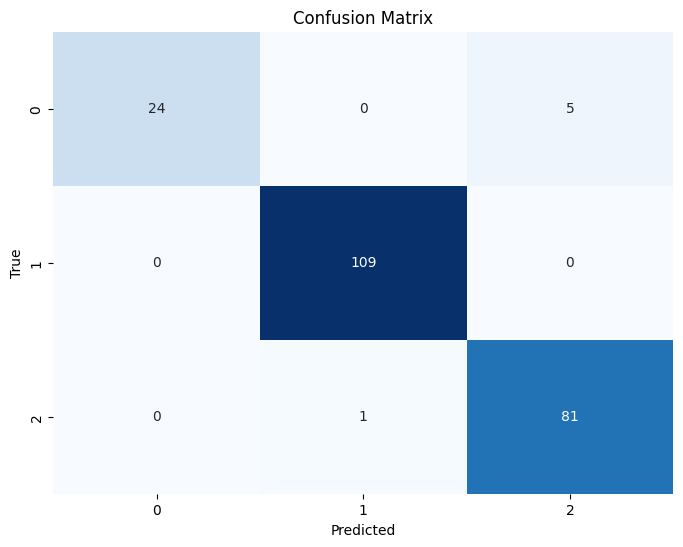

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('Confusion_Matrix.png')
plt.show()


### ROC Curve

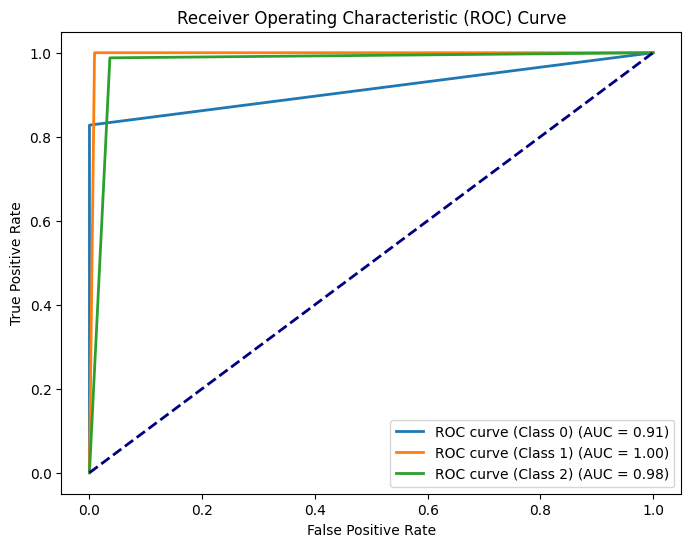

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

y_test_bin = label_binarize(y_test_encoded, classes=range(num_classes))
y_pred_bin = label_binarize(y_pred_encoded, classes=range(num_classes))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve (Class %d) (AUC = %0.2f)' % (i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig("roc.png")
plt.show()


### Precision Recall Curve

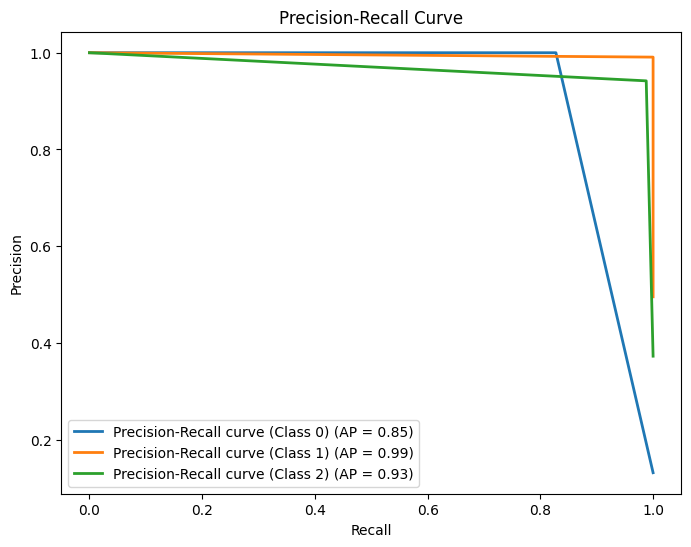

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
y_test_bin = label_binarize(y_test_encoded, classes=range(num_classes))
y_pred_bin = label_binarize(y_pred_encoded, classes=range(num_classes))

precision = dict()
recall = dict()
average_precision = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_bin[:, i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], lw=2, label='Precision-Recall curve (Class %d) (AP = %0.2f)' % (i, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.savefig("precision_recall.png")
plt.show()


### Anvil Server Connection

In [ ]:
import anvil.server

anvil.server.connect("server_NAECE2ZWBXZX46KYUC6ZA6WH-2RW2FGVB4GEX7EQ2")
import anvil.media
from anvil import server

Disconnecting from previous connection first...
Connecting to wss://anvil.works/uplink
Anvil websocket closed (code 1000, reason=b'')
Anvil websocket open
Connected to "Published" as SERVER


### Calling function from Anvil

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
import io
import base64
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.densenet.preprocess_input(img_array)
    return img_array
@server.callable
def predict_ctscan_label(file_content):
    file_bytes = base64.b64decode(file_content)

    img = image.load_img(io.BytesIO(file_bytes), target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = tf.keras.applications.densenet.preprocess_input(img_array)

    features = densenet_base.predict(img_array)
    features_flattened = features.flatten().reshape(1, -1)

    predicted_proba = xgb_model.predict_proba(features_flattened)[0]
    predicted_class = np.argmax(predicted_proba)
    predicted_class_name = class_names[predicted_class]

    confidence_score = predicted_proba[predicted_class]

    return predicted_class_name, confidence_score, predicted_proba

In [ ]:
class_names = ['Malignant cases', 'Bengin cases', 'Normal cases']
#image_path = "/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/Normal cases/Normal case (1).jpg"
#image_path='/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/Malignant cases/Malignant case (1).jpg'
image_path='/content/drive/MyDrive/The IQ-OTHNCCD lung cancer dataset/Bengin cases/Bengin case (1).jpg'
# densenet_base, xgb_model = load_pretrained_models()
predicted_class_name, confidence_score, predicted_proba = predict_ctscan_label(image_path)
print("Predicted class name:", predicted_class_name)
print("Confidence score:", confidence_score)
print("Probability distribution:", predicted_proba)